In [ ]:
cd /content/drive/MyDrive/Colab Notebooks/빅데이터학

/content/drive/MyDrive/Colab Notebooks/빅데이터학


### Exercise 1

In [ ]:
%matplotlib inline
import math
import time
from GoogleNgrams import Ngrams
import pandas as pd, matplotlib.pyplot as plt

a = pd.read_csv('Fame.txt', sep = '\t')
a.head()

,Name,Birth.Year,Occupation
0,Abraham Lincoln,1809,Politician
1,Nelson Mandela,1918,Politician
2,John F. Kennedy,1917,Politician
3,Winston Churchill,1874,Politician
4,Mahatma Gandhi,1869,Politician


### Exercise 2

In [ ]:
tmp = []
for i in range(0, math.ceil(len(a.Name)/12)) : #for i in range(0, 3)
    tmp.append(Ngrams(', '.join(a.Name[(i*12):((i+1)*12)])))
    time.sleep(0.5) #Ngramviewer가 한 IP에서 여러 번의 요청을 차단함
b = pd.concat(tmp, axis = 1)

In [ ]:
b.shape

(220, 34)

In [ ]:
b.iloc[0:4, 0:4]

,Abraham Lincoln,Nelson Mandela,John F. Kennedy,Winston Churchill
1800,1.038176e-07,0.0,4.146157e-09,6.336571e-08
1801,8.553227e-08,0.0,3.316925e-09,5.131212e-08
1802,7.224366e-08,0.0,2.764104e-09,4.372687e-08
1803,6.359800e-08,0.0,2.369232e-09,3.781515e-08


### Exercise 3

In [ ]:
 i = 1809-1800
 b.iloc[i:(i+100), 0]
 #100개의 행이 추출됨

<class 'int'>
9


1809    1.305939e-08
1810    1.263177e-08
1811    1.249810e-08
1812    1.095335e-08
1813    1.015213e-08
            ...     
1904    2.079041e-06
1905    2.183372e-06
1906    2.371406e-06
1907    2.397332e-06
1908    2.426455e-06
Name: Abraham Lincoln, Length: 100, dtype: float64

In [ ]:
c = []
for i in range(0, b.shape[-1]) :
    j = a['Birth.Year'][i] - 1800
    Series = b.iloc[j:(j+100), i] #출생년도부터 100년만의 data 출력
    Series.index = range(0, 100)  #index = 0 ~ 99
    c.append(Series)
c = pd.concat(c, axis = 1)

In [ ]:
c.shape

(100, 34)

In [ ]:
b.shape[0]

220

In [ ]:
#교수님 답안
temp = []
for i in range(0, b.shape[-1]) :
    j = a['Birth.Year'][i] - 1800
    Series = b.iloc[j:(j+100), i]
    Series.index = range(0, 100)
    temp.append(Series)
c = pd.concat(temp, axis = 1)

In [ ]:
a.Occupation.value_counts()
#Series를 구성하는 빈도를 산출하여 Series로 출력
#Series에만 적용 가능한 value_counts 함수 

Politician    17
Scientist      4
Artist         4
Author         3
Athlete        2
Actor          2
Scholar        2
Name: Occupation, dtype: int64

In [ ]:
a.Occupation.value_counts().sort_index(ascending=False)

Scientist      4
Scholar        2
Politician    17
Author         3
Athlete        2
Artist         4
Actor          2
Name: Occupation, dtype: int64

In [ ]:
a.Occupation.value_counts().sort_values()
#출력 결과 : Politician이 절반 이상을 차지함

Athlete        2
Actor          2
Scholar        2
Author         3
Scientist      4
Artist         4
Politician    17
Name: Occupation, dtype: int64

In [ ]:
a.loc[a.Occupation != 'Politician', 'Occupation'] = 'NonPolitician'
a.head(8)

,Name,Birth.Year,Occupation
0,Abraham Lincoln,1809,Politician
1,Nelson Mandela,1918,Politician
2,John F. Kennedy,1917,Politician
3,Winston Churchill,1874,Politician
4,Mahatma Gandhi,1869,Politician
5,Charles Darwin,1809,NonPolitician
6,Albert Einstein,1879,NonPolitician
7,Jawaharlal Nehru,1889,Politician


Hierarchical Indexing

column 인덱스와 관련하여 작업 -> column 인덱스의 계층을 만드는 indexing

In [ ]:
a.Occupation.head(10)

0       Politician
1       Politician
2       Politician
3       Politician
4       Politician
5    NonPolitician
6    NonPolitician
7       Politician
8    NonPolitician
9       Politician
Name: Occupation, dtype: object

In [ ]:
c.columns[:10]

Index(['Abraham Lincoln', 'Nelson Mandela', 'John F. Kennedy',
       'Winston Churchill', 'Mahatma Gandhi', 'Charles Darwin',
       'Albert Einstein', 'Jawaharlal Nehru', 'Vincent Van Gogh',
       'Franklin D. Roosevelt'],
      dtype='object')

In [ ]:
pairs = zip(a.Occupation, c.columns) #두개의 iterable object를 하나의 tuple로 묶는 zip 함수
pairs #generator 형태로 zip 데이터가 나옴

In [ ]:
tuple(pairs)

(('Politician', 'Abraham Lincoln'),
 ('Politician', 'Nelson Mandela'),
 ('Politician', 'John F. Kennedy'),
 ('Politician', 'Winston Churchill'),
 ('Politician', 'Mahatma Gandhi'),
 ('NonPolitician', 'Charles Darwin'),
 ('NonPolitician', 'Albert Einstein'),
 ('Politician', 'Jawaharlal Nehru'),
 ('NonPolitician', 'Vincent Van Gogh'),
 ('Politician', 'Franklin D. Roosevelt'),
 ('NonPolitician', 'Thomas Edison'),
 ('Politician', 'Rosa Parks'),
 ('Politician', 'Lyndon Johnson'),
 ('Politician', 'Indira Gandhi'),
 ('NonPolitician', 'George Orwell'),
 ('NonPolitician', 'Jesse Owens'),
 ('Politician', 'Joseph Stalin'),
 ('Politician', 'Vladimir Lenin'),
 ('NonPolitician', 'Ingrid Bergman'),
 ('NonPolitician', 'Leo Tolstoy'),
 ('NonPolitician', 'Pablo Picasso'),
 ('NonPolitician', 'Oscar Wilde'),
 ('NonPolitician', 'Coco Chanel'),
 ('Politician', 'Charles de Gaulle'),
 ('NonPolitician', 'John M. Keynes'),
 ('NonPolitician', 'Louis Pasteur'),
 ('Politician', 'Adolf Hitler'),
 ('NonPolitician', '

In [ ]:
pd.MultiIndex.from_tuples(zip(a.Occupation, c.columns))
#tuple 형태를 MultiIndex 데이터 타입으로 바꿔줌

MultiIndex([(   'Politician',       'Abraham Lincoln'),
            (   'Politician',        'Nelson Mandela'),
            (   'Politician',       'John F. Kennedy'),
            (   'Politician',     'Winston Churchill'),
            (   'Politician',        'Mahatma Gandhi'),
            ('NonPolitician',        'Charles Darwin'),
            ('NonPolitician',       'Albert Einstein'),
            (   'Politician',      'Jawaharlal Nehru'),
            ('NonPolitician',      'Vincent Van Gogh'),
            (   'Politician', 'Franklin D. Roosevelt'),
            ('NonPolitician',         'Thomas Edison'),
            (   'Politician',            'Rosa Parks'),
            (   'Politician',        'Lyndon Johnson'),
            (   'Politician',         'Indira Gandhi'),
            ('NonPolitician',         'George Orwell'),
            ('NonPolitician',           'Jesse Owens'),
            (   'Politician',         'Joseph Stalin'),
            (   'Politician',        'Vladimir L

In [ ]:
c.columns = pd.MultiIndex.from_tuples(zip(a.Occupation, c.columns))
c.columns.names = ['Occupation', 'Name']
c.loc[:, ::4]
#하나의 index임에도 다양한 index가 형성됨
#순서가 

Occupation      Politician                   NonPolitician     Politician  \
Name       Abraham Lincoln Mahatma Gandhi Vincent Van Gogh Lyndon Johnson   
0             1.305939e-08   1.292167e-10     0.000000e+00   7.455121e-10   
1             1.263177e-08   1.694579e-10     0.000000e+00   7.978430e-10   
2             1.249810e-08   2.018550e-10     0.000000e+00   3.852584e-10   
3             1.095335e-08   2.408768e-10     0.000000e+00   3.852584e-10   
4             1.015213e-08   1.565540e-10     0.000000e+00   4.126351e-10   
..                     ...            ...              ...            ...   
95            2.079041e-06   1.079543e-06     3.347010e-08   7.204334e-07   
96            2.183372e-06   1.119960e-06     3.402495e-08   7.285140e-07   
97            2.371406e-06   1.156968e-06     3.402385e-08   7.344175e-07   
98            2.397332e-06   1.177597e-06     3.320192e-08   7.476941e-07   
99            2.426455e-06   1.143833e-06     3.398018e-08   7.588837e-07   

Occupation               NonPolitician                   Politician  \
Name       Joseph Stalin Pablo Picasso John M. Keynes Ronald Reagan   
0           2.189852e-10  6.907923e-11   6.424526e-11  2.495410e-10   
1           2.189852e-10  6.907923e-11   6.424526e-11  2.632293e-10   
2           2.189852e-10  6.907923e-11   6.424526e-11  2.314530e-10   
3           2.189852e-10  6.907923e-11   6.424526e-11  1.895617e-10   
4           2.139254e-10  2.760302e-11   6.424526e-11  2.349961e-10   
..                   ...           ...            ...           ...   
95          9.455975e-08  1.077241e-07   4.278384e-09  1.918622e-06   
96          9.200488e-08  1.145805e-07   4.362261e-09  1.933145e-06   
97          9.005330e-08  1.219854e-07   4.305369e-09  1.882076e-06   
98          8.927269e-08  1.269209e-07   4.257876e-09  1.816235e-06   
99          8.861186e-08  1.319262e-07   4.192098e-09  1.770691e-06   

Occupation                
Name          Mao Zedong  
0           1.178434e-09  
1           2.135990e-11  
2           2.135990e-11  
3           2.135990e-11  
4           4.801983e-10  
..                   ...  
95          8.451100e-07  
96          9.245535e-07  
97          9.355077e-07  
98          9.611547e-07  
99          9.818360e-07  

[100 rows x 9 columns]

In [ ]:
c.head()

Occupation      Politician                                                   \
Name       Abraham Lincoln Nelson Mandela John F. Kennedy Winston Churchill   
0             1.305939e-08   2.117548e-10    1.097641e-08      1.036366e-08   
1             1.263177e-08   2.387516e-10    1.034520e-08      7.299637e-09   
2             1.249810e-08   2.692241e-10    8.462611e-09      8.049425e-09   
3             1.095335e-08   1.997896e-10    8.166710e-09      7.241353e-09   
4             1.015213e-08   2.227146e-10    6.706260e-09      8.211848e-09   

Occupation                 NonPolitician                       Politician  \
Name       Mahatma Gandhi Charles Darwin Albert Einstein Jawaharlal Nehru   
0            1.292167e-10   2.068481e-08    5.894912e-09     2.530063e-09   
1            1.694579e-10   2.002557e-08    8.398406e-09     2.493001e-09   
2            2.018550e-10   1.848451e-08    4.680016e-09     2.493001e-09   
3            2.408768e-10   2.013561e-08    4.813636e-09     2.425309e-09   
4            1.565540e-10   1.748176e-08    3.573596e-09     2.394765e-09   

Occupation    NonPolitician            Politician  ...  NonPolitician  \
Name       Vincent Van Gogh Franklin D. Roosevelt  ... John M. Keynes   
0                       0.0          2.058685e-09  ...   6.424526e-11   
1                       0.0          3.607027e-09  ...   6.424526e-11   
2                       0.0          3.572075e-09  ...   6.424526e-11   
3                       0.0          3.673644e-09  ...   6.424526e-11   
4                       0.0          3.559865e-09  ...   6.424526e-11   

Occupation                  Politician    NonPolitician    Politician  \
Name       Louis Pasteur  Adolf Hitler Alfred Hitchcock Ronald Reagan   
0           1.636034e-10  1.132744e-09     2.575114e-09  2.495410e-10   
1           8.346229e-10  1.082679e-09     2.369337e-09  2.632293e-10   
2           6.710195e-10  1.107026e-09     1.835133e-09  2.314530e-10   
3           6.710195e-10  1.320625e-09     1.943312e-09  1.895617e-10   
4           6.710195e-10  1.110766e-09     2.088589e-09  2.349961e-10   

Occupation NonPolitician                   Politician                \
Name           Babe Ruth Sigmund Freud Woodrow Wilson    Mao Zedong   
0           2.612173e-10  2.861206e-10   1.381893e-09  1.178434e-09   
1           2.547575e-10  3.319956e-10   1.427768e-09  2.135990e-11   
2           3.751156e-10  3.319956e-10   1.470274e-09  2.135990e-11   
3           3.264213e-10  2.353941e-10   1.441525e-09  2.135990e-11   
4           3.050614e-10  2.353941e-10   1.744649e-09  4.801983e-10   

Occupation     NonPolitician  
Name       Katherine Hepburn  
0               1.473231e-11  
1               2.776425e-11  
2               2.776425e-11  
3               6.699641e-11  
4               9.353349e-11  

[5 rows x 34 columns]

In [ ]:
c.groupby(level='Occupation', axis = 1).median().head()
#무엇을 기준으로 groupby를 할 것인가 
#첫 번째 층위 (level의 값) : Occupation
#axis = 1 : 가로 방향의 median 값을 산출
#groupby까지만 사용하면 DataFrame 형태로 나오지 않음. 뒤에 .median()을 붙여줘야 함

Occupation,NonPolitician,Politician
0,2.529986e-10,7.455121e-10
1,2.547575e-10,3.763035e-10
2,3.319956e-10,3.852584e-10
3,2.353941e-10,3.967531e-10
4,3.050614e-10,4.746221e-10


-데이터 실험의 경우 발생 가능한 변수들을 차단 / 동일하게 만들어줘야함

-정치인 -> 40-50 초반에 급등

-Aiden, Michel의 내용과 유사한 패턴

-직업별로 유명인의 명성 추세 패턴도 다름

-------------------------

직업별 차이는 보이나, Nonpolitician과 Politician 간의 유사성이 있는가?



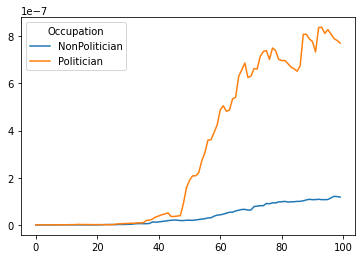

In [ ]:
c.groupby(level = 'Occupation', axis = 1).median().plot()

In [ ]:
d = c.groupby(level = 'Occupation', axis = 1).median()
d.head()

Occupation,NonPolitician,Politician
0,2.529986e-10,7.455121e-10
1,2.547575e-10,3.763035e-10
2,3.319956e-10,3.852584e-10
3,2.353941e-10,3.967531e-10
4,3.050614e-10,4.746221e-10


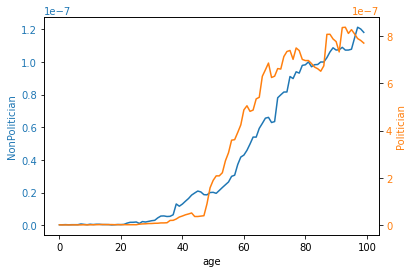

In [ ]:
#dual y-axis
#Nonpolitician의 빈도 차이가 작지만 그럼에도 politician과 유사하지 않을까?
#정치인의 명성은 늦게 상승하나 상승 정도가 급격함

#CN color(default color) : C0, C1, C2

fig, ax1 = plt.subplots()
ax1.set_xlabel('age')
ax1.set_ylabel('NonPolitician', color = 'C0')
ax1.plot(d.NonPolitician, color = 'C0')
ax1.tick_params(axis = 'y', labelcolor = 'C0')
ax2 = ax1.twinx()
ax2.set_ylabel('Politician', color = 'C1')
ax2.plot(d.Politician, color = 'C1')
ax2.tick_params(axis = 'y', labelcolor = 'C1')